In [1]:
import constants
import matplotlib.pyplot as plt

from helpers import rk4
from helpers import ODEs_nineboxes
from helpers import euler_method

In [2]:
# initial_masses = constants.Mi0
constants.MODIFIED_EMISSIONS = False
constants.FORCING = True
constants.FIRE = False

# define our time range
xinitial = 1800
xfinal =   2200

# define our sample size -- this gets us close to our Nyquist frequency
n=2650

In [3]:
# perform rk4 integration on our nine boxes with IPCC A2 forcing
rungekutta_nine = rk4(fxy=ODEs_nineboxes, x0=xinitial, xf=xfinal, y0=constants.Mi0_nineboxes, N=n)

STEP SIZE: 0.1509433962264151


/Users/ejb/Desktop/UBCV/2024W1/eosc453/assn1/code/helpers.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  ODEs[r] = -np.sum(M[r]*rate_constants_nineboxes[r,:]) + (rate_constants_nineboxes[:,r] @ M)


RK4 Time Elapsed: 1.352 seconds


In [4]:
# perform euler integration on our nine boxes with modified emissions forcing
euler_nine = euler_method(fxy=ODEs_nineboxes, x0=xinitial, xf=xfinal, y0=constants.Mi0_nineboxes, N=n)

Euler Time Elapsed: 0.332 seconds


Text(0.7, -0.025, '* time step $h = 8/53$ *')

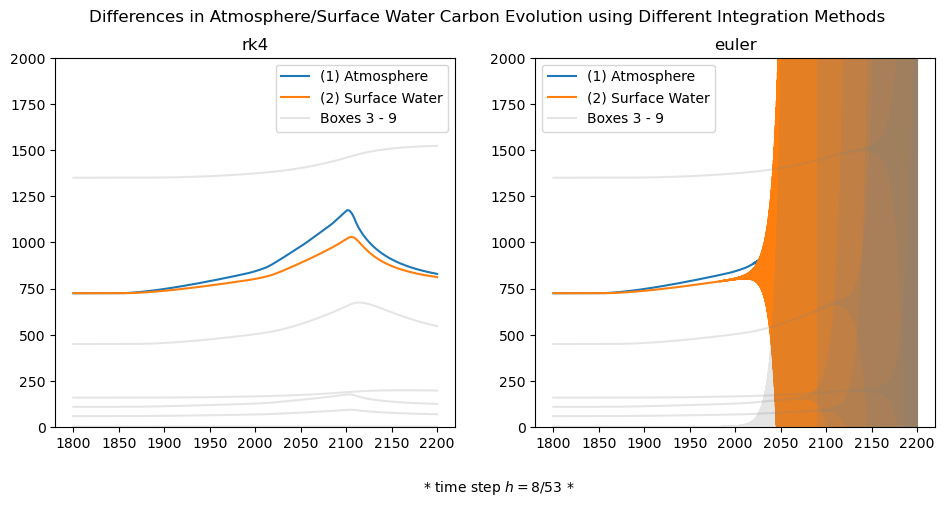

In [7]:
# plot our two integration methods
fig, axes = plt.subplots(1,2)
bigp0 = axes[0].plot(rungekutta_nine[0],rungekutta_nine[1])
bigp1 = axes[1].plot(euler_nine[0], euler_nine[1])

# set axis bounds
axes[0].set_ylim([0,2000])
axes[1].set_ylim([0,2000])

# label plots
axes[0].set_title('rk4')
axes[1].set_title('euler')
fig.suptitle('Differences in Atmosphere/Surface Water Carbon Evolution using Different Integration Methods',x=0.8)

# (this is used if our ylim or xlim aren't so constraining... we don't want to see all nine boxes...)
for i in range(2,9):
    bigp0[i].set_color('grey'), bigp1[i].set_color('grey')
    bigp0[i].set_alpha(0.2)
    bigp1[i].set_alpha(0.2)

# legendary legends
axes[0].legend(['(1) Atmosphere','(2) Surface Water', 'Boxes 3 - 9'])
axes[1].legend(['(1) Atmosphere','(2) Surface Water', 'Boxes 3 - 9'])


fig.subplots_adjust(right=1.5)
plt.figtext(x=0.7,y=-0.025, s='* time step $h = 8/53$ *')

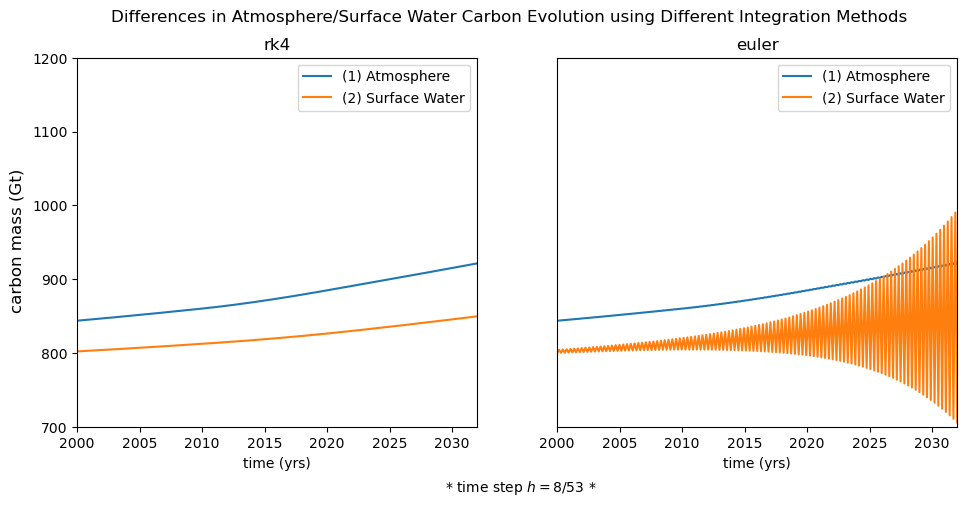

In [6]:
# plot our two integration methods... but this time we're gonna zoom in...
fig, axes = plt.subplots(1,2)
bigp0 = axes[0].plot(rungekutta_nine[0],rungekutta_nine[1])
bigp1 = axes[1].plot(euler_nine[0], euler_nine[1])

# label plots
axes[0].set_title('rk4')
axes[1].set_title('euler')
fig.suptitle('Differences in Atmosphere/Surface Water Carbon Evolution using Different Integration Methods',x=0.8)

# legendary legends
axes[0].legend(['(1) Atmosphere','(2) Surface Water'])
axes[1].legend(['(1) Atmosphere','(2) Surface Water'])

# bound axes to ZOOM
ylim = [700,1200]
xlim = [2000,2032]
axes[0].set_ylim(ylim)
axes[1].set_ylim(ylim)
axes[0].set_xlim(xlim)
axes[1].set_xlim(xlim)

# make second plot y-axis invisible since we already have one on the leftmost plot
axes[1].yaxis.set_visible(False)

axes[0].set_xlabel('time (yrs)')
axes[1].set_xlabel('time (yrs)')

fig.supylabel('carbon mass (Gt)')

plt.subplots_adjust(right=1.5)
plt.figtext(x=0.7,y=-0.025, s='* time step $h = 8/53$ *')

fig.savefig('RK4vsEULER',bbox_inches='tight')